This project is inspired from statquest
https://www.youtube.com/watch?v=q90UDEgYqeI

I. IMPORT NEEDED LIBRARY

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

II. IMPORT DATASET

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [4]:
## Concatenating two DataFrames
df = pd.concat([X,y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


III. MISSING DATA

Looking at the information of dataframe, you could easily to indentify missing values at two columns - 'ca' (299 non-null/ 303 observations), 'thal' (301 non-null/ 303 observations)

Because the number of missing values are relative small (6/303 - making up about 2% of dataset) as comparision to total observation, these rows should be removed from data set 

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


IV. FORMAT DATA
1. Features of model

In [7]:
X = df.drop('num', axis=1).copy()

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB


In [9]:
X['ca'].unique()

array([0., 3., 2., 1.])

One Hot Encoding

The list below tell us what each variable represents and the type of data (float or categorical) it should contain:

- age(Integer): Age (years)
- sex(Categorical):	Sex (1 = male; 0 = female)			
- cp(Categorical):	chest pain type
                    (1 = typical angina
                    2 = atypical angina
                    3 = non-anginal pain
                    4 = asymptomatic)			
- trestbps(Integer):resting blood pressure (on admission to - the hospital)	mm Hg
- chol(Integer): serum cholestoral	mg/dl
- fbs(Categorical):	fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
- restecg(Categorical): resting electrocardiographic results
          (0 = normal
           1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
           2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach(Integer): maximum heart rate achieved
- exang(Categorical): exercise induced angina (1 = yes; 0 = no)
- oldpeak(Float): ST depression induced by exercise relative to rest
- slope(Categorical): the slope of the peak exercise ST segment
                      (1 = upsloping
                      2 = flat
                      3 = downsloping)
-  ca(Categorical): number of major vessels (0-3) colored by flourosopy
- thal(Categorical): (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

For age, trestbps, chol, thalach, oldpeak are all interger or float, which is good 

For the categorical data, we need convert a column of categorical data into columns of binary value. Because 'sex', 'fbs', 'exang' are already converted into correct form, we don't need to convert them anymore.

In [11]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [12]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


2. Target of model

y doesn't just contains 0s and 1s. Instead, It has 5 different levels of heart disease( 0 = no heart disease, 1-4 represent for various degree of heart disease) . To make it easily for prediction, I just only care whether they have heart disese or not

In [13]:
y= df['num'].copy()

In [14]:
y_encoded = y.copy()
y_encoded.loc[y_encoded > 0] = 1

In [15]:
y_encoded.unique()

array([0, 1])

V. BUILD PRELIMINARY CLASSIFICATION TREE

In [16]:
## Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=42)

In [17]:
## Create a decision tree and fit the training data
clf_dt= DecisionTreeClassifier(random_state =42)
clf_dt= clf_dt.fit(X_train, y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'trestbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngin

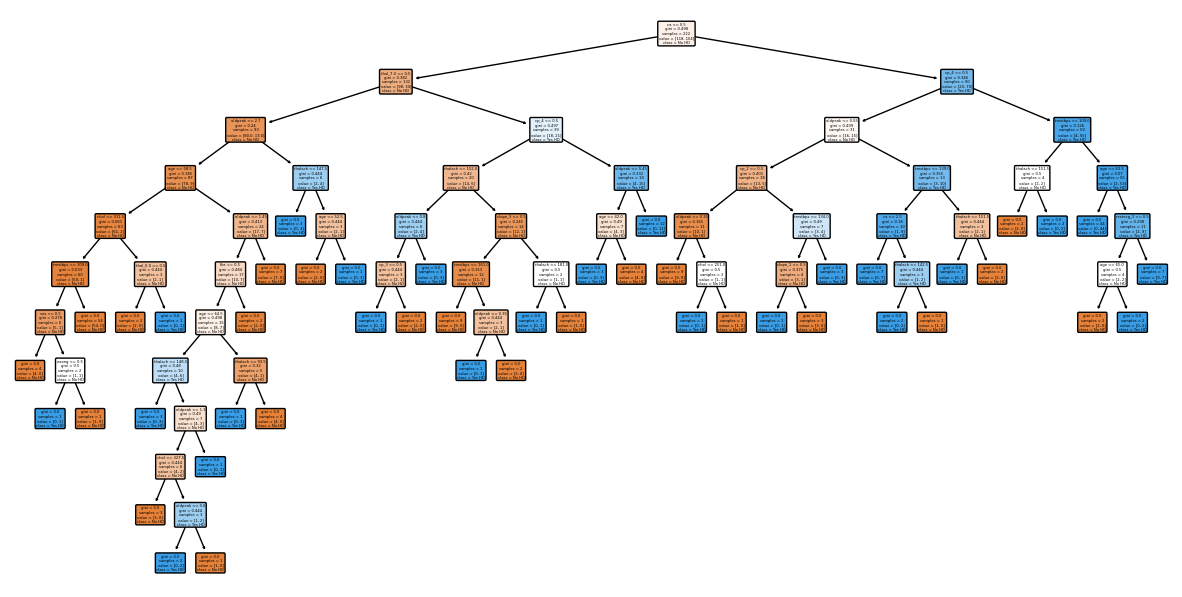

In [18]:
## Plot classification tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled = True,
         rounded= True,
         class_names=["No HD", "Yes HD"],
         feature_names = X_encoded.columns)

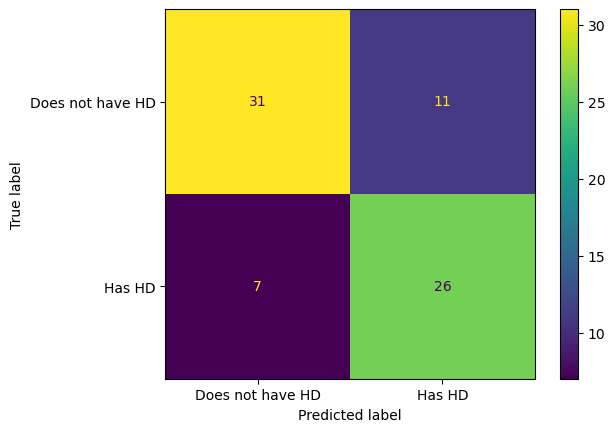

In [19]:
## Display confusion matrix with testing data
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()

In [20]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



VI. PRUNE CLASSIFICATION TREE - COST COMPLEXITY PRUNING

In [21]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine value of alpha
ccp_alphas = path.ccp_alphas #extract different value of alpha
ccp_alphas = ccp_alphas[:-1] #omit the maximum value of alpha 

clf_dts=[] #create an array that we will put decision tree into

#create decision tree for training data per value of alpha storing in the array
for ccp_alpha in ccp_alphas:
    clf_dt =  DecisionTreeClassifier(random_state=0, ccp_alpha= ccp_alpha)
    clf_dt = clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

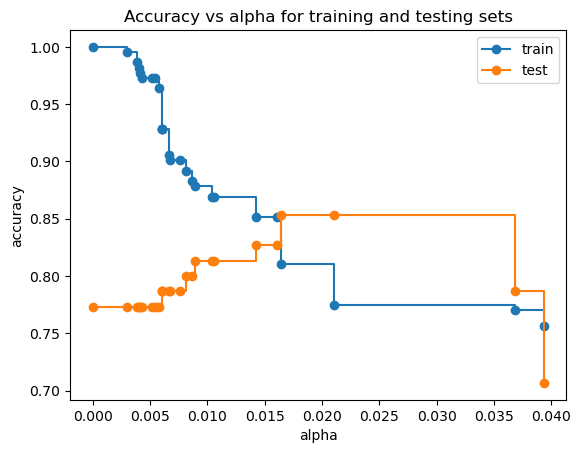

In [22]:
## Calculate the accuracy of decision tree for training and testing data with different value of alpha in the array 
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

## Plot accuracy vs alpha for training and testing sets
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker= "o", label="train", drawstyle= "steps-post")
ax.plot(ccp_alphas, test_scores, marker= "o", label="test", drawstyle= "steps-post")
ax.legend()
plt.show()

As you can see at the graph, 0.016 is the optimal value for alpha - it produces the effective accuracy for training and testing data.

But we don't know whether it is sensitive or not to the change in the training/testing data. We will check this by 

<Axes: xlabel='tree'>

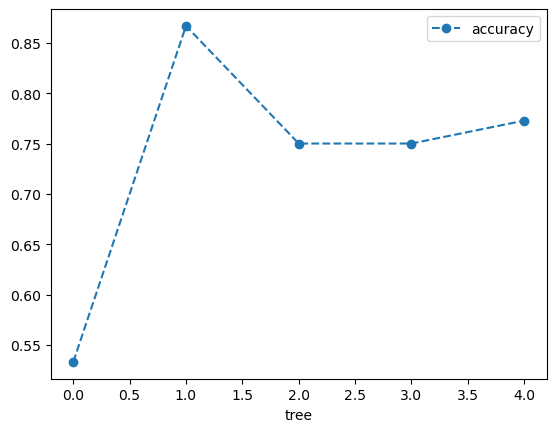

In [23]:
## Build Classification Tree with 0.016 alpha value 
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.016)

## Use cross validation (5-fold) and calculate the acccuracy for decision tree
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})
                        
df.plot(x='tree', y= 'accuracy', marker='o', linestyle ='--')


The graph above shows that using different training and testing datasets with the same alpha will produce the different value of accuracies, suggesting the alpha is very sensitive to the datasets.

So instead of using single training and testing datasets, we will use cross validation to find optimal value of alpha

<Axes: xlabel='alpha'>

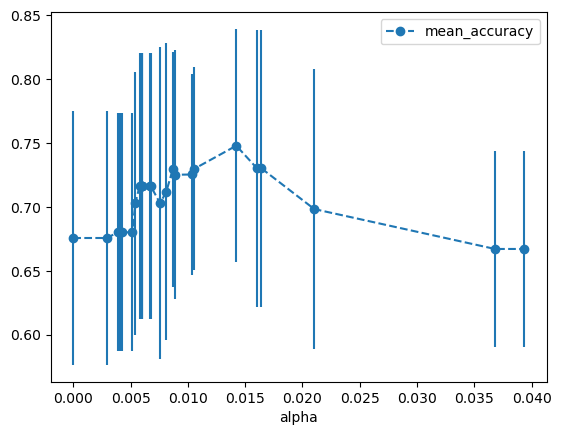

In [24]:
## Create an array to store the resutls of each fold during cross validation
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt =  DecisionTreeClassifier(random_state=0, ccp_alpha= ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Draw the graph for each candidate value of alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x= 'alpha', y= 'mean_accuracy', yerr= 'std', marker= 'o', linestyle ='--')

Looking at the graph, about 0.014 is better than 0.016 because of its smaller standard deviation, suggesting the alpha is less sensitive to the datasets.

In [25]:
## Extract the exact value of optimal alpha value
alpha_results[(alpha_results['alpha'] > 0.013)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [26]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.013)
             &
             (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [27]:
## Convert to the float
ideal_ccp_alpha= float(ideal_ccp_alpha)
ideal_ccp_alpha

/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_48866/1263128058.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha= float(ideal_ccp_alpha)


0.014224751066856332

VII. BUILD AND DRAW FINAL TREE

In [28]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha= ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned .fit(X_train, y_train)

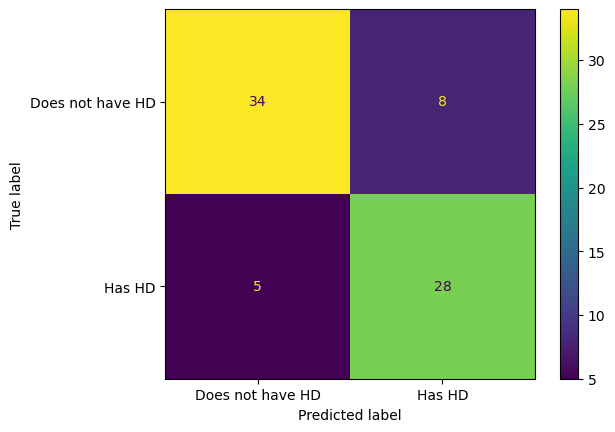

In [29]:
predictions = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()

In [30]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

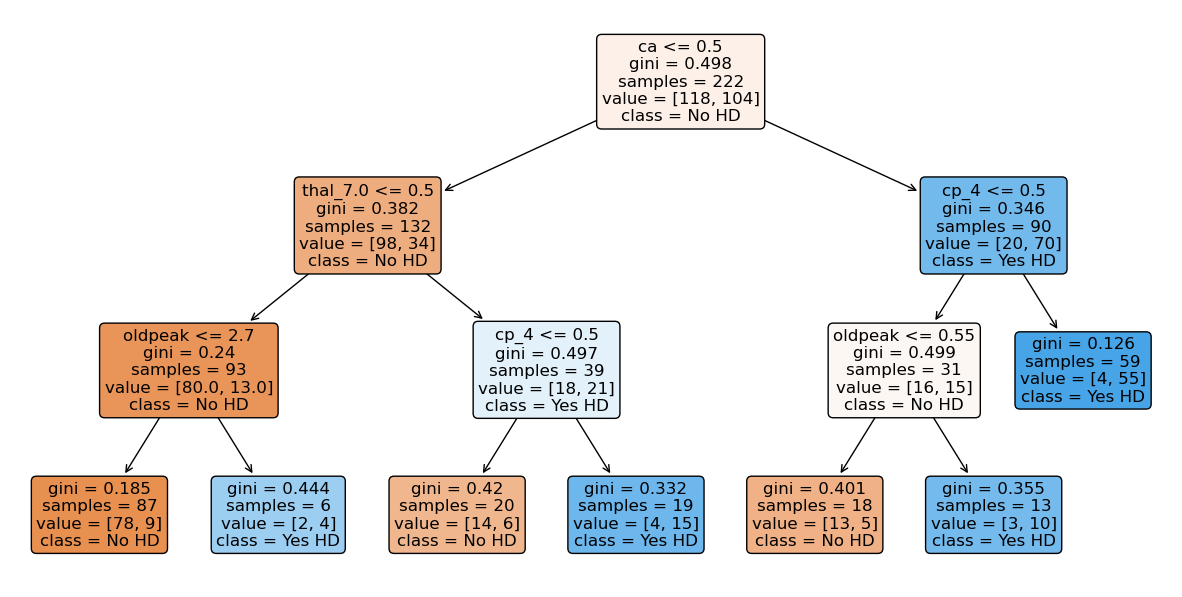

In [31]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded= True,
         class_names=["No HD", "Yes HD"],
         feature_names = X_encoded.columns)